In [ ]:
import csv
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import layers

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-07-18 11:47:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.05s   

2020-07-18 11:47:09 (103 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [ ]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", 
             "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", 
             "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", 
             "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", 
             "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", 
             "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", 
             "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", 
             "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", 
             "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

with open('/tmp/bbc-text.csv', 'r') as filename:
  datastore = csv.reader(filename)
  next(datastore)
  for row in datastore:
    labels.append(row[0])
    sentence = row[1]
    for word in stopwords:
      token = " " + word + " "
      sentence = sentence.replace(token, " ")
    sentences.append(sentence)
print(len(labels))
print(len(sentences))
print(sentences[0])    

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [ ]:
vocabulary = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<oov>'
padding_type = 'post'
training_portion = 0.8

In [ ]:
training_size = int(len(sentences) * training_portion)
train_sentences = sentences[:training_size]
train_labels = labels[:training_size]
validation_sentences = sentences[training_size:]
validation_labels = labels[training_size:]
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
445
445


In [ ]:
tokenizer = Tokenizer(num_words=vocabulary, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
200
120
192
120


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
print(training_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [ ]:
import numpy as np

labels_tokenizer = Tokenizer()
training_labels = labels_tokenizer.fit_on_texts(train_labels)

training_label_seq = np.array(labels_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(labels_tokenizer.texts_to_sequences(validation_labels))

In [ ]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[5]
[2]
[1]
(1780, 1)
[4]
[5]
[3]
(445, 1)


In [ ]:
import keras
model = keras.Sequential()
model.add(layers.Embedding(vocabulary,embedding_dim,input_length=max_length))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(24,activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 150       
Total params: 160,558
Trainable params: 160,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(train_padded,
          training_label_seq,
          epochs=num_epochs,
          validation_data=(validation_padded,validation_label_seq),
          verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1780 samples, validate on 445 samples
Epoch 1/30
 - 1s - loss: 1.7639 - accuracy: 0.3556 - val_loss: 1.7244 - val_accuracy: 0.5506
Epoch 2/30
 - 0s - loss: 1.6546 - accuracy: 0.6292 - val_loss: 1.5760 - val_accuracy: 0.6674
Epoch 3/30
 - 0s - loss: 1.4388 - accuracy: 0.8202 - val_loss: 1.3249 - val_accuracy: 0.8270
Epoch 4/30
 - 0s - loss: 1.1257 - accuracy: 0.9230 - val_loss: 1.0190 - val_accuracy: 0.8989
Epoch 5/30
 - 0s - loss: 0.7938 - accuracy: 0.9607 - val_loss: 0.7464 - val_accuracy: 0.9079
Epoch 6/30
 - 0s - loss: 0.5298 - accuracy: 0.9685 - val_loss: 0.5554 - val_accuracy: 0.9303
Epoch 7/30
 - 0s - loss: 0.3542 - accuracy: 0.9798 - val_loss: 0.4296 - val_accuracy: 0.9281
Epoch 8/30
 - 0s - loss: 0.2446 - accuracy: 0.9871 - val_loss: 0.3534 - val_accuracy: 0.9348
Epoch 9/30
 - 0s - loss: 0.1751 - accuracy: 0.9921 - val_loss: 0.3032 - val_accuracy: 0.9393
Epoch 10/30
 - 0s - loss: 0.1286 - accuracy: 0.9949 - val_loss: 0.2705 - val_accuracy: 0.9416
Epoch 11/30
 - 0s - lo

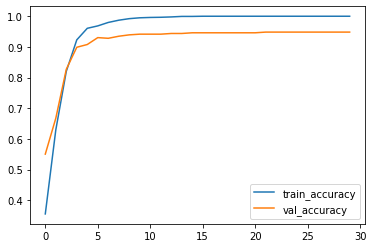

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))

plt.plot(train_accuracy, label='train_accuracy')
plt.plot(val_accuracy,label='val_accuracy')
plt.legend()
plt.show()


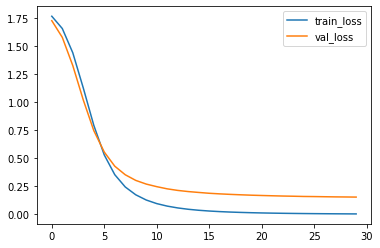

In [ ]:
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.show()